In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.abspath(filepath))

from common import *
from notebooks.eval_util import *

/Users/cyz/survey/active_survey


Using TensorFlow backend.


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset = 'cces12'
sim_objects_filename = '{}/data/{}-sim-objects.pkl'.format(filepath, dataset)
response_filename = filepath + '/data/cces/cces12_cs.csv'
question_filename = filepath + "/data/cces/cces12_questions_short.csv"

In [4]:
sim_objects = deserialize(sim_objects_filename)

In [5]:
responses = pd.read_csv(response_filename, index_col=0)
questions = responses.columns.tolist()

In [6]:
question_df = pd.read_csv(question_filename, index_col=0)
question_to_label = {row['question']: row['text'] for index, row in question_df.iterrows()}
question_to_label

{'CC302': 'Economy over past year',
 'CC304': 'Household income past 4 years',
 'CC302a': 'Economy over next year',
 'CC305': 'Iraq - Mistake?',
 'CC306': 'Afghanistan - Mistake?',
 'CC308a': 'Approval - Obama',
 'CC308b': 'Approval - Congress',
 'CC308c': 'Approval - Supreme Court',
 'CC321': 'Climate',
 'CC322_1': 'Legalize law-abiding',
 'CC322_2': 'Increase border patrols',
 'CC322_3': 'Police questioning',
 'CC322_4': 'Fine employers of illegal immigrants',
 'CC322_5': 'No public services for illegal immigrants',
 'CC322_6': 'No birthright citizenship',
 'CC324': 'Abortion',
 'CC325': 'Jobs-Environment',
 'CC326': 'Gay Marriage',
 'CC327': 'Affirmative Action',
 'CC332A': 'Roll Call - Ryan Budget Bill',
 'CC332B': 'Roll Call - Simpson-Bowles Budget Plan',
 'CC332C': 'Roll Call - Middle Class Tax Cut Act',
 'CC332D': 'Roll Call - Tax Hike Prevention Act',
 'CC332E': 'Roll Call - Birth Control Exemption',
 'CC332F': 'Roll Call - US-Korea Free Trade Agreement',
 'CC332G': 'Roll Call 

In [7]:
alpha = 1

Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations


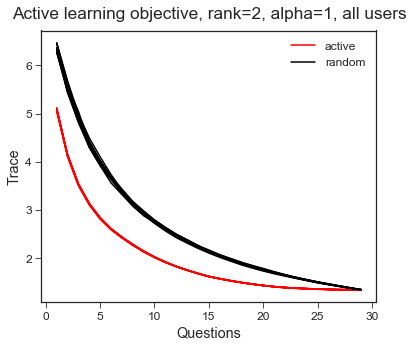

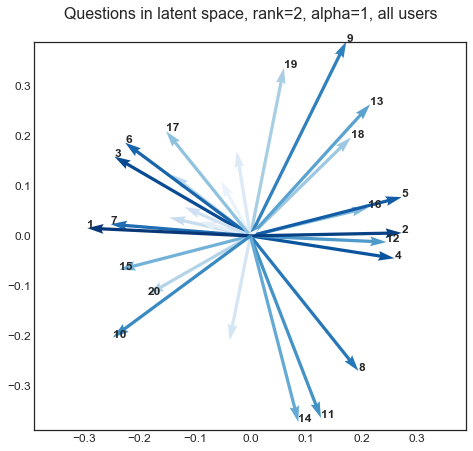

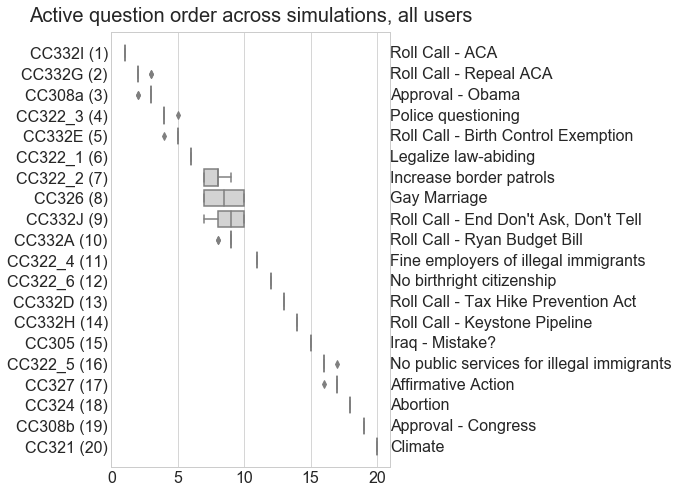

In [8]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
plot_objective(sim_objects,
               rank=2, optimality_type='A', v_method='row-norm', alpha=alpha)
plot_question_order(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    max_labels=20, max_plots=1)
plot_question_ranks(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label,
                    show_max_questions=20)

Extracting cache for 10 simulations
Extracting cache for 10 simulations


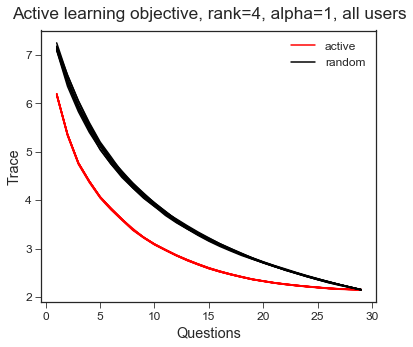

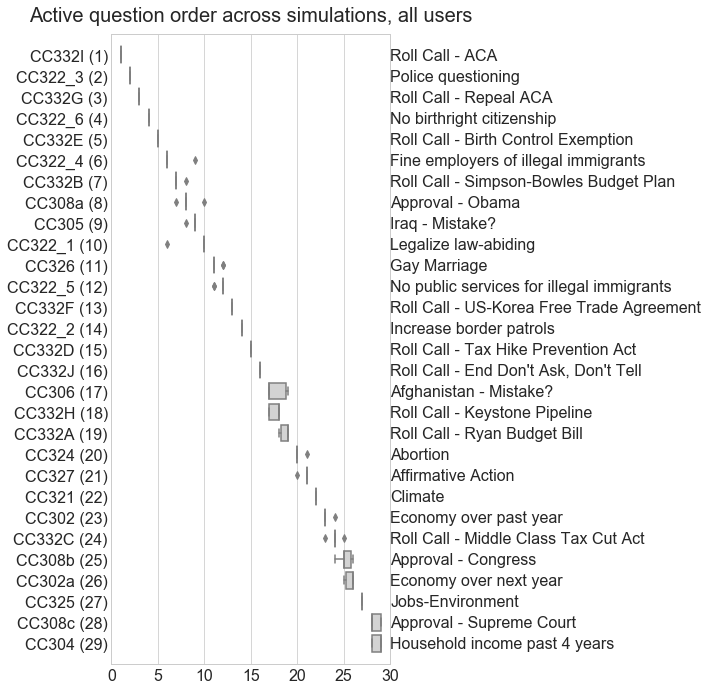

In [9]:
plot_objective(sim_objects,
               rank=4, optimality_type='A', v_method='row-norm', alpha=alpha)
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label)

Extracting cache for 10 simulations


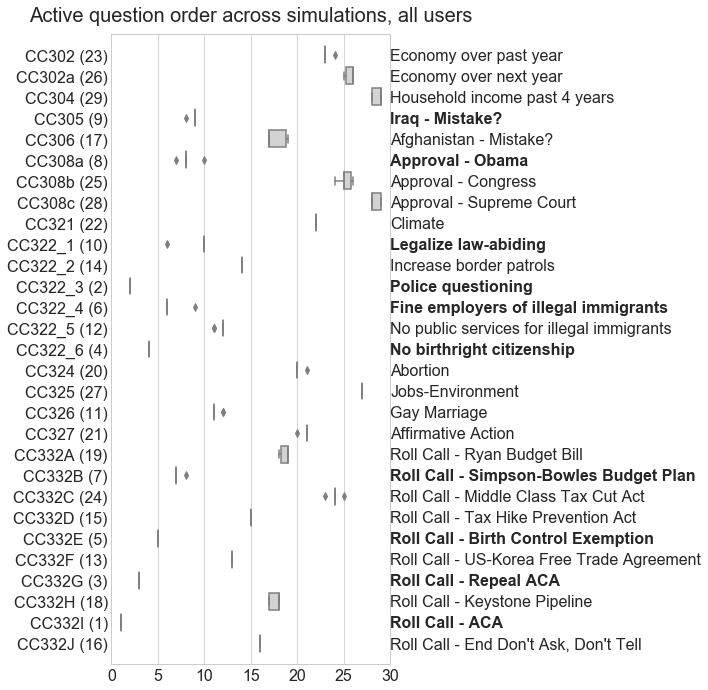

In [10]:
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label, 
                    sort_by_rank=False)

ae800690-914d-469d-a9fc-6a42150468e7_active


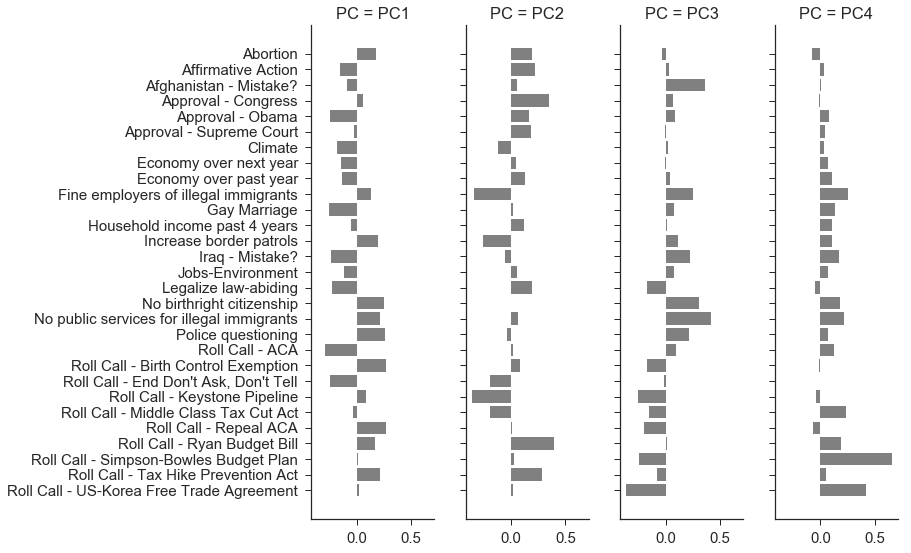

In [11]:
V_filename = None  #'{}/data/{}-V.csv'.format(filepath, dataset)
display_V(sim_objects, questions, question_to_label,
          rank=4, optimality_type='A', v_method='row-norm', alpha=alpha, 
          filename=V_filename)